In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os
os.environ['OMP_NUM_THREADS'] = '1' 

In [3]:
dataset = pd.read_csv('online_shoppers_intention.csv')

In [7]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
dataset.iloc[:,11].unique()

array([1, 2, 4, 3, 7, 6, 8, 5], dtype=int64)

In [172]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
dataset.iloc[:,12].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64)

In [10]:
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [24]:
dataset.select_dtypes(include=['object', 'bool']).describe()

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


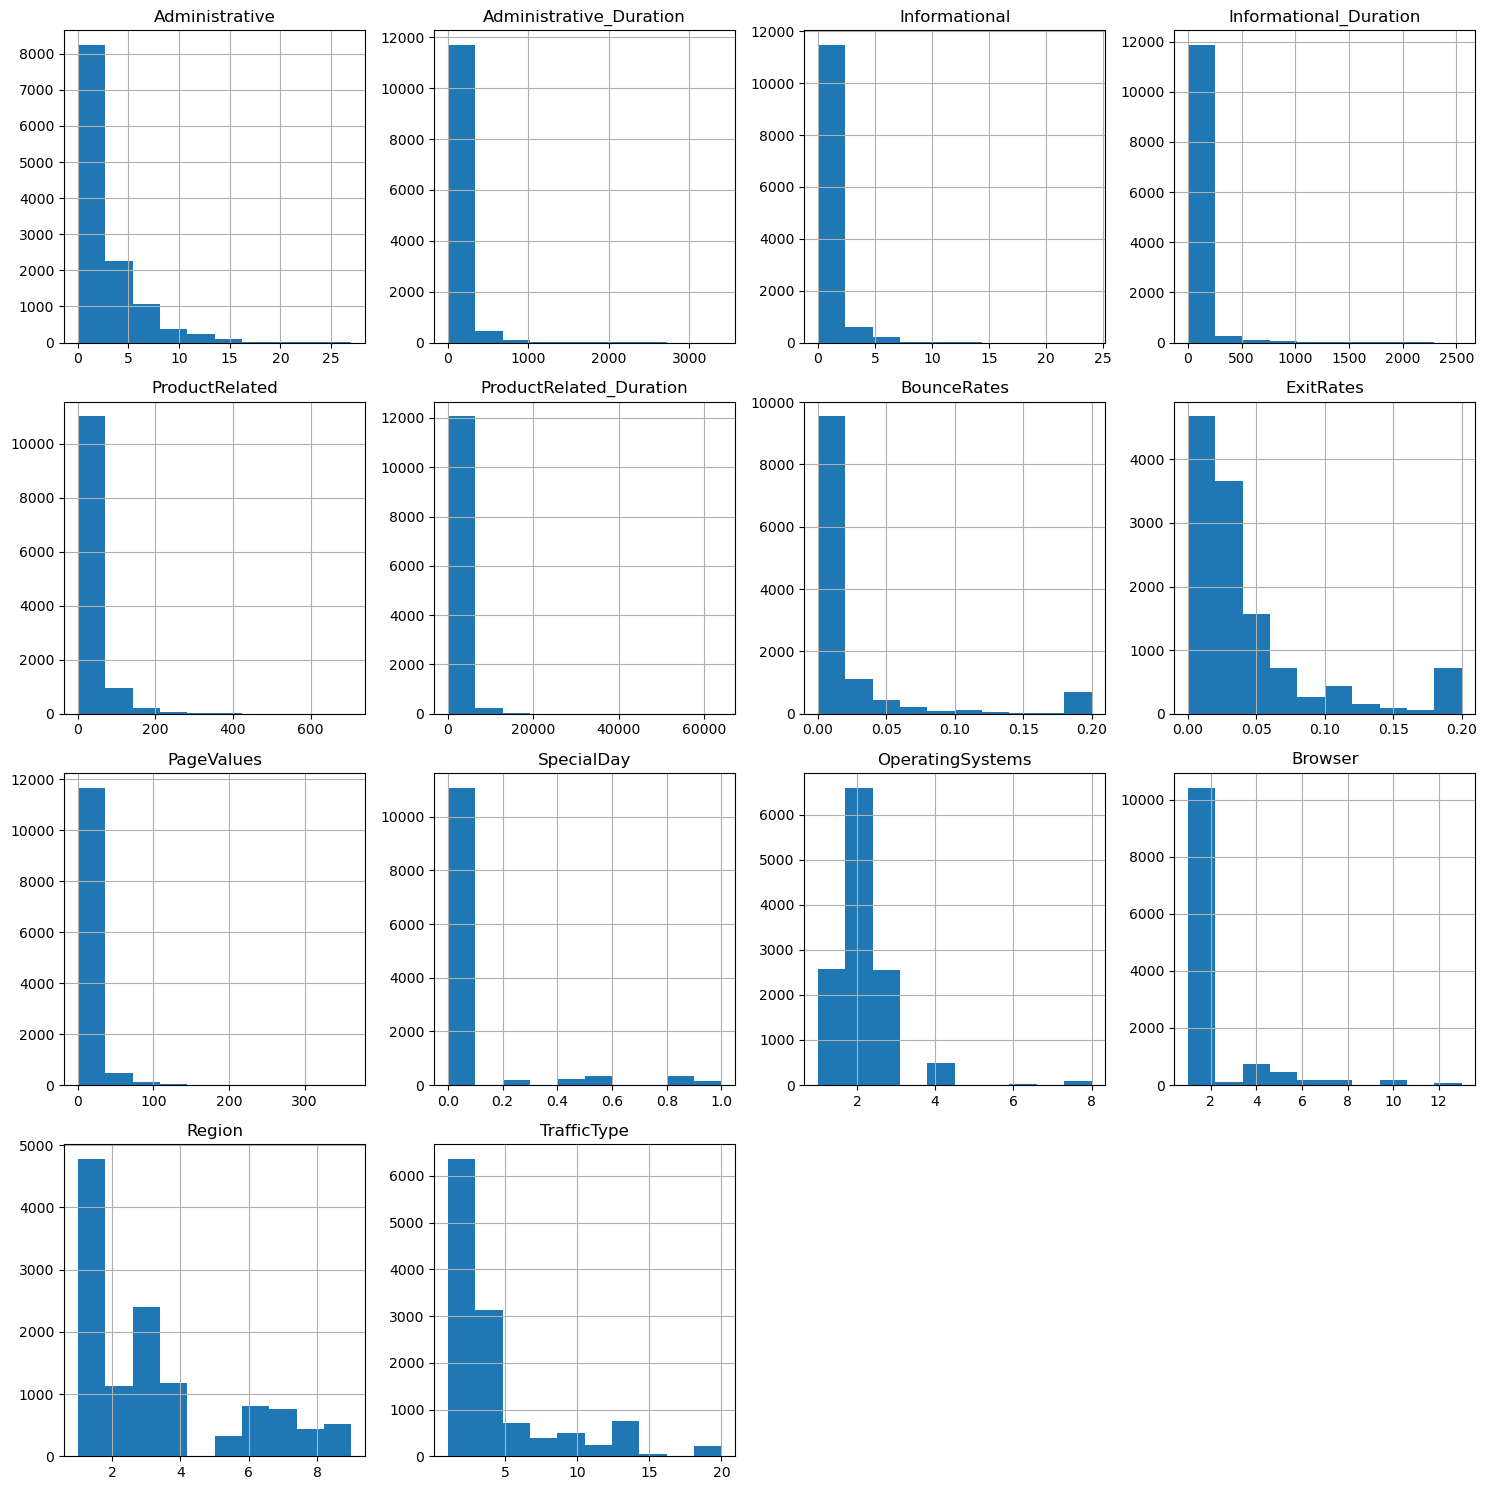

In [28]:
dataset.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

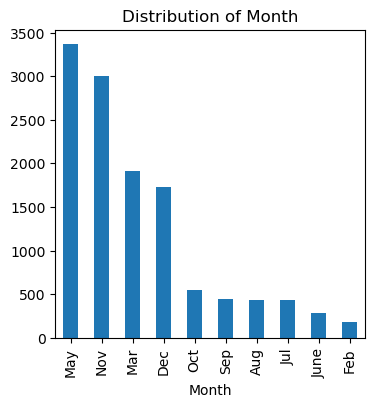

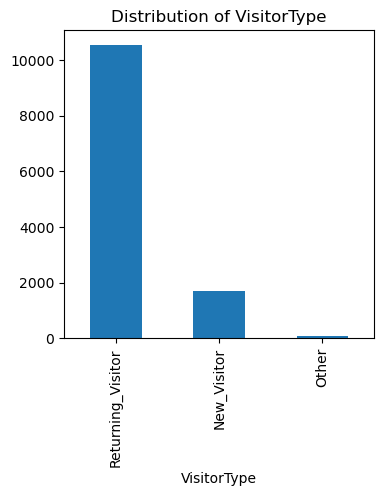

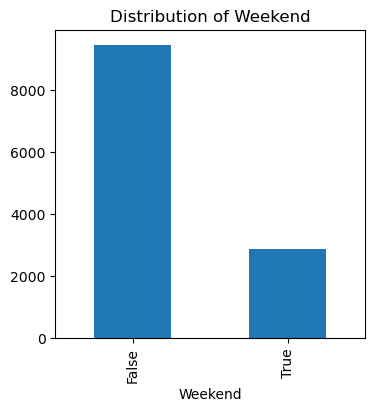

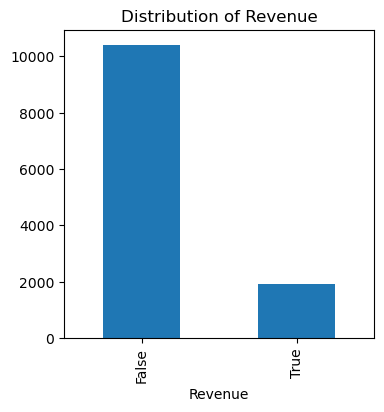

In [50]:
for x in dataset.select_dtypes(include=['object','bool']):
    plt.figure(figsize=(4, 4))
    dataset[x].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {x}')
    plt.show()

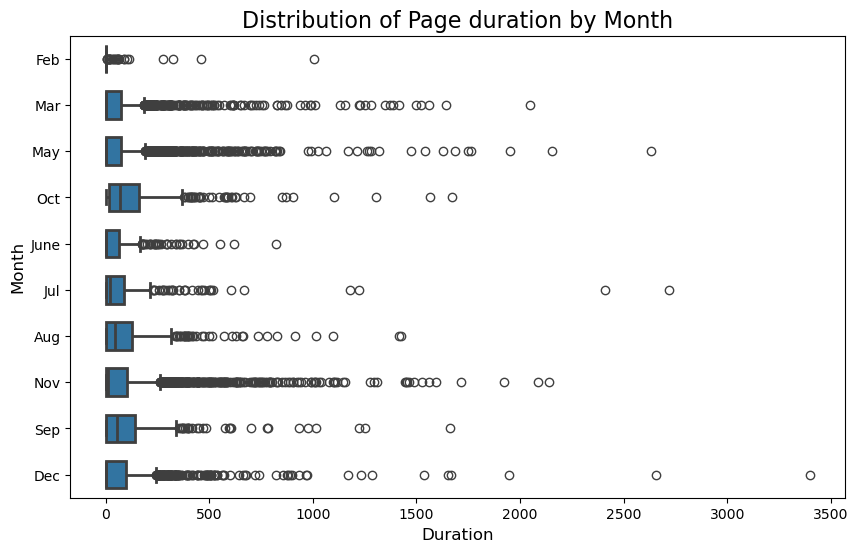

In [174]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Administrative_Duration", y="Month", data=dataset, 
             width=0.6, linewidth=2)
plt.title("Distribution of Page duration by Month", fontsize=16)
plt.xlabel("Duration", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.show()

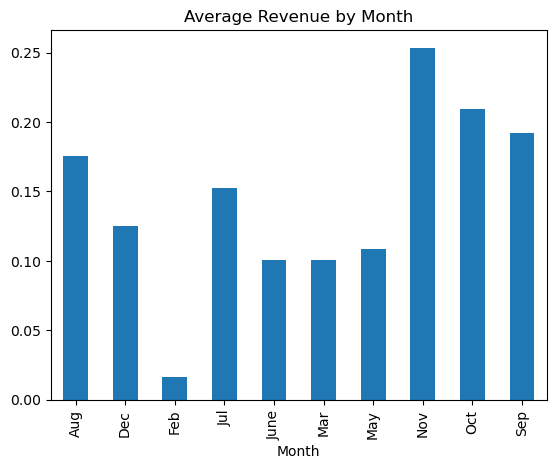

In [56]:
dataset.groupby('Month')['Revenue'].mean().plot(kind='bar')
plt.title('Average Revenue by Month')
plt.show()

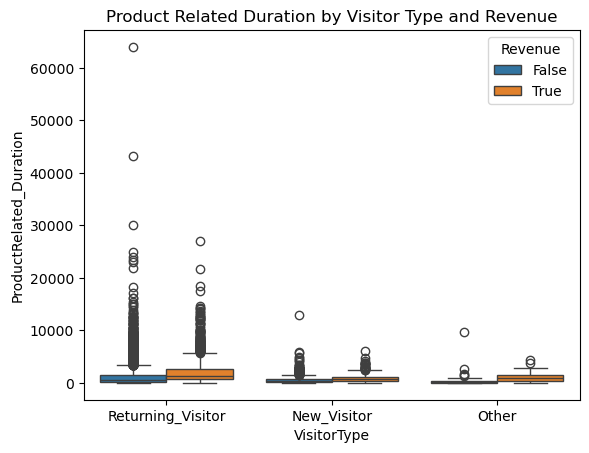

In [58]:
sns.boxplot(x='VisitorType', y='ProductRelated_Duration', hue='Revenue', data=dataset)
plt.title('Product Related Duration by Visitor Type and Revenue')
plt.show()

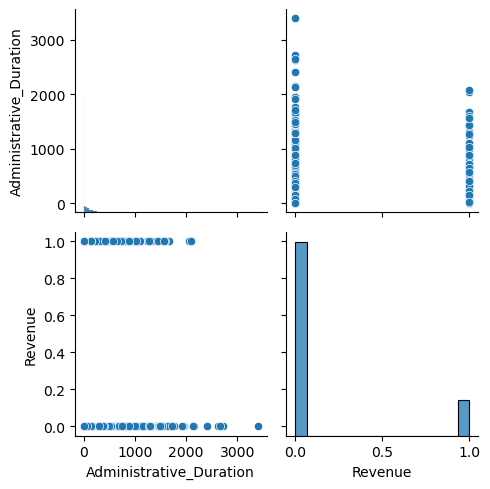

In [66]:
sns.pairplot(dataset[['Administrative_Duration','Revenue']])
plt.tight_layout()
plt.show()

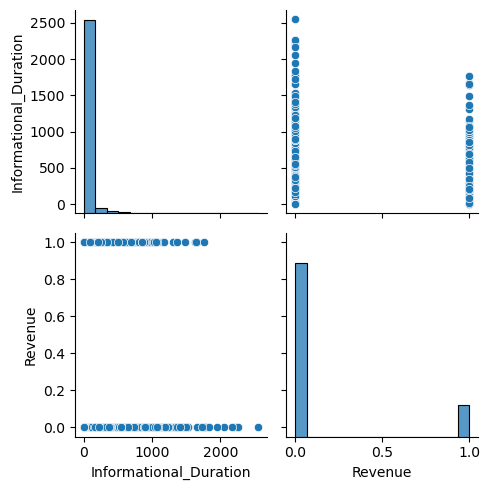

In [68]:
sns.pairplot(dataset[['Informational_Duration','Revenue']])
plt.tight_layout()
plt.show()

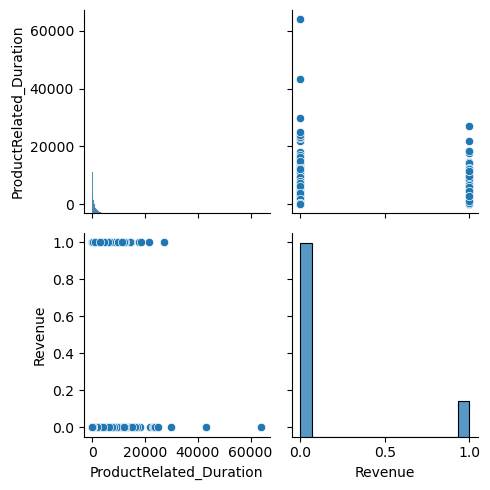

In [70]:
sns.pairplot(dataset[['ProductRelated_Duration','Revenue']])
plt.tight_layout()
plt.show()

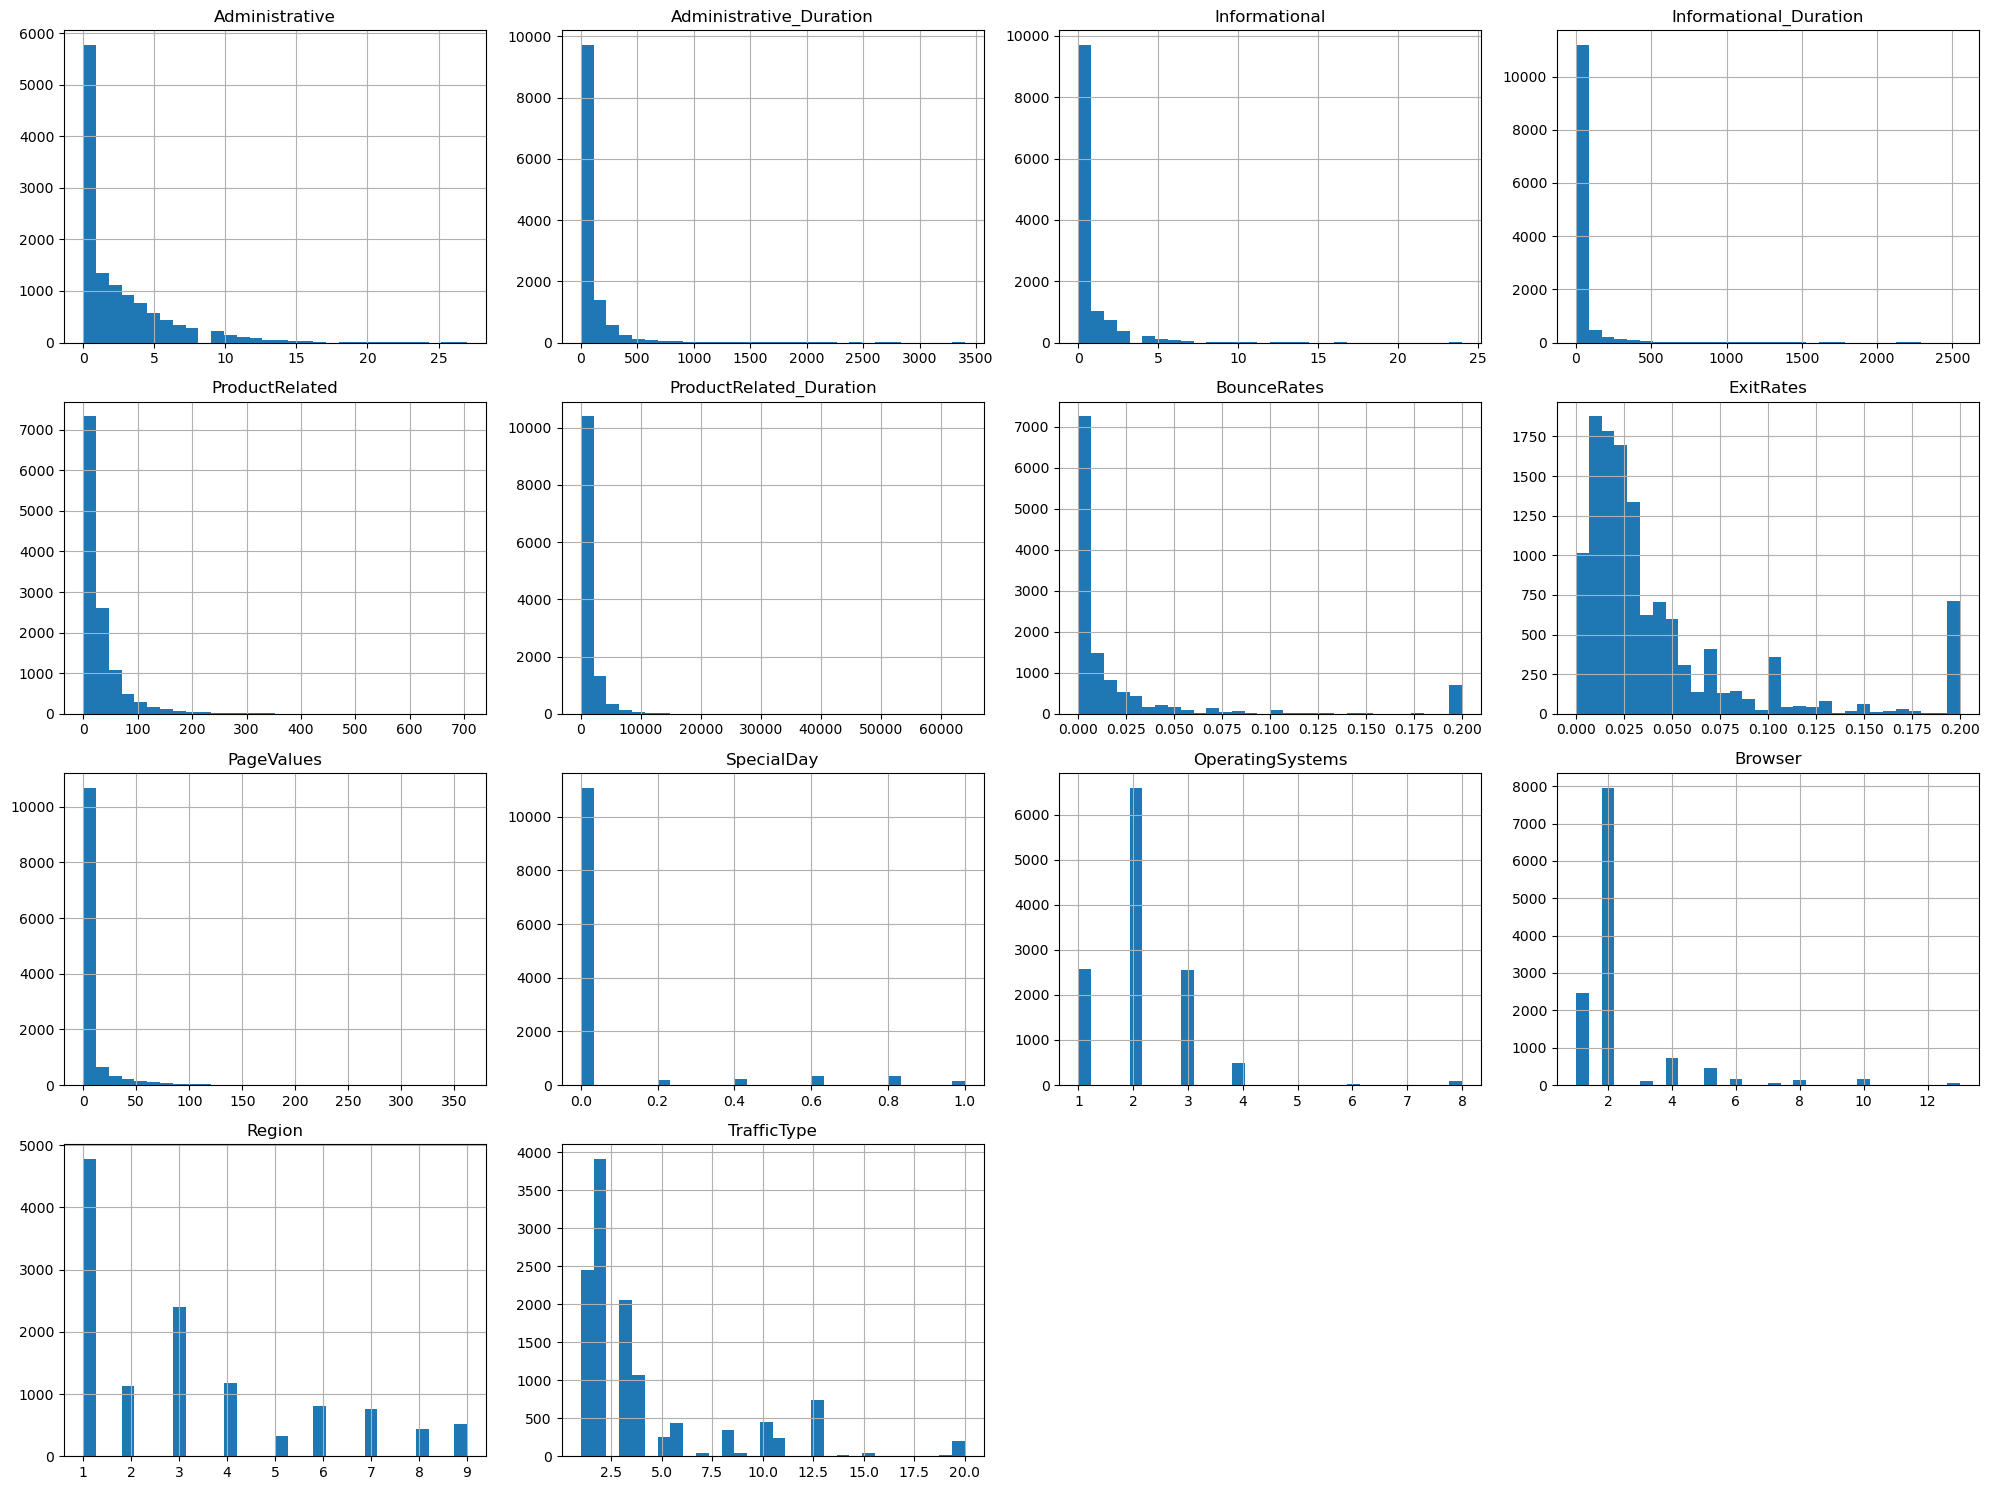

In [38]:
numerical_cols = dataset.select_dtypes(include=[np.number]).columns
dataset[numerical_cols].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

In [6]:
dataset.iloc[:,13].unique()

array([1, 9, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [7]:
dataset.iloc[:,14].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20], dtype=int64)

In [100]:
from sklearn import preprocessing 
enc = preprocessing.OrdinalEncoder()

In [102]:
dataset['Month'] = enc.fit_transform(dataset['Month'].values.reshape(-1,1))
dataset['VisitorType'] = enc.fit_transform(dataset['VisitorType'].values.reshape(-1,1))
dataset['Weekend'] = enc.fit_transform(dataset['Weekend'].values.reshape(-1,1))
dataset['Revenue'] = enc.fit_transform(dataset['Revenue'].values.reshape(-1,1))

In [104]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,1,1,1,1,2.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2.0,2,2,1,2,2.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,4,1,9,3,2.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2.0,3,2,2,4,2.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2.0,3,3,1,4,2.0,1.0,0.0


In [106]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]

In [19]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test = train_test_split(X_feature , Y , test_size = 0.3, random_state = 0)

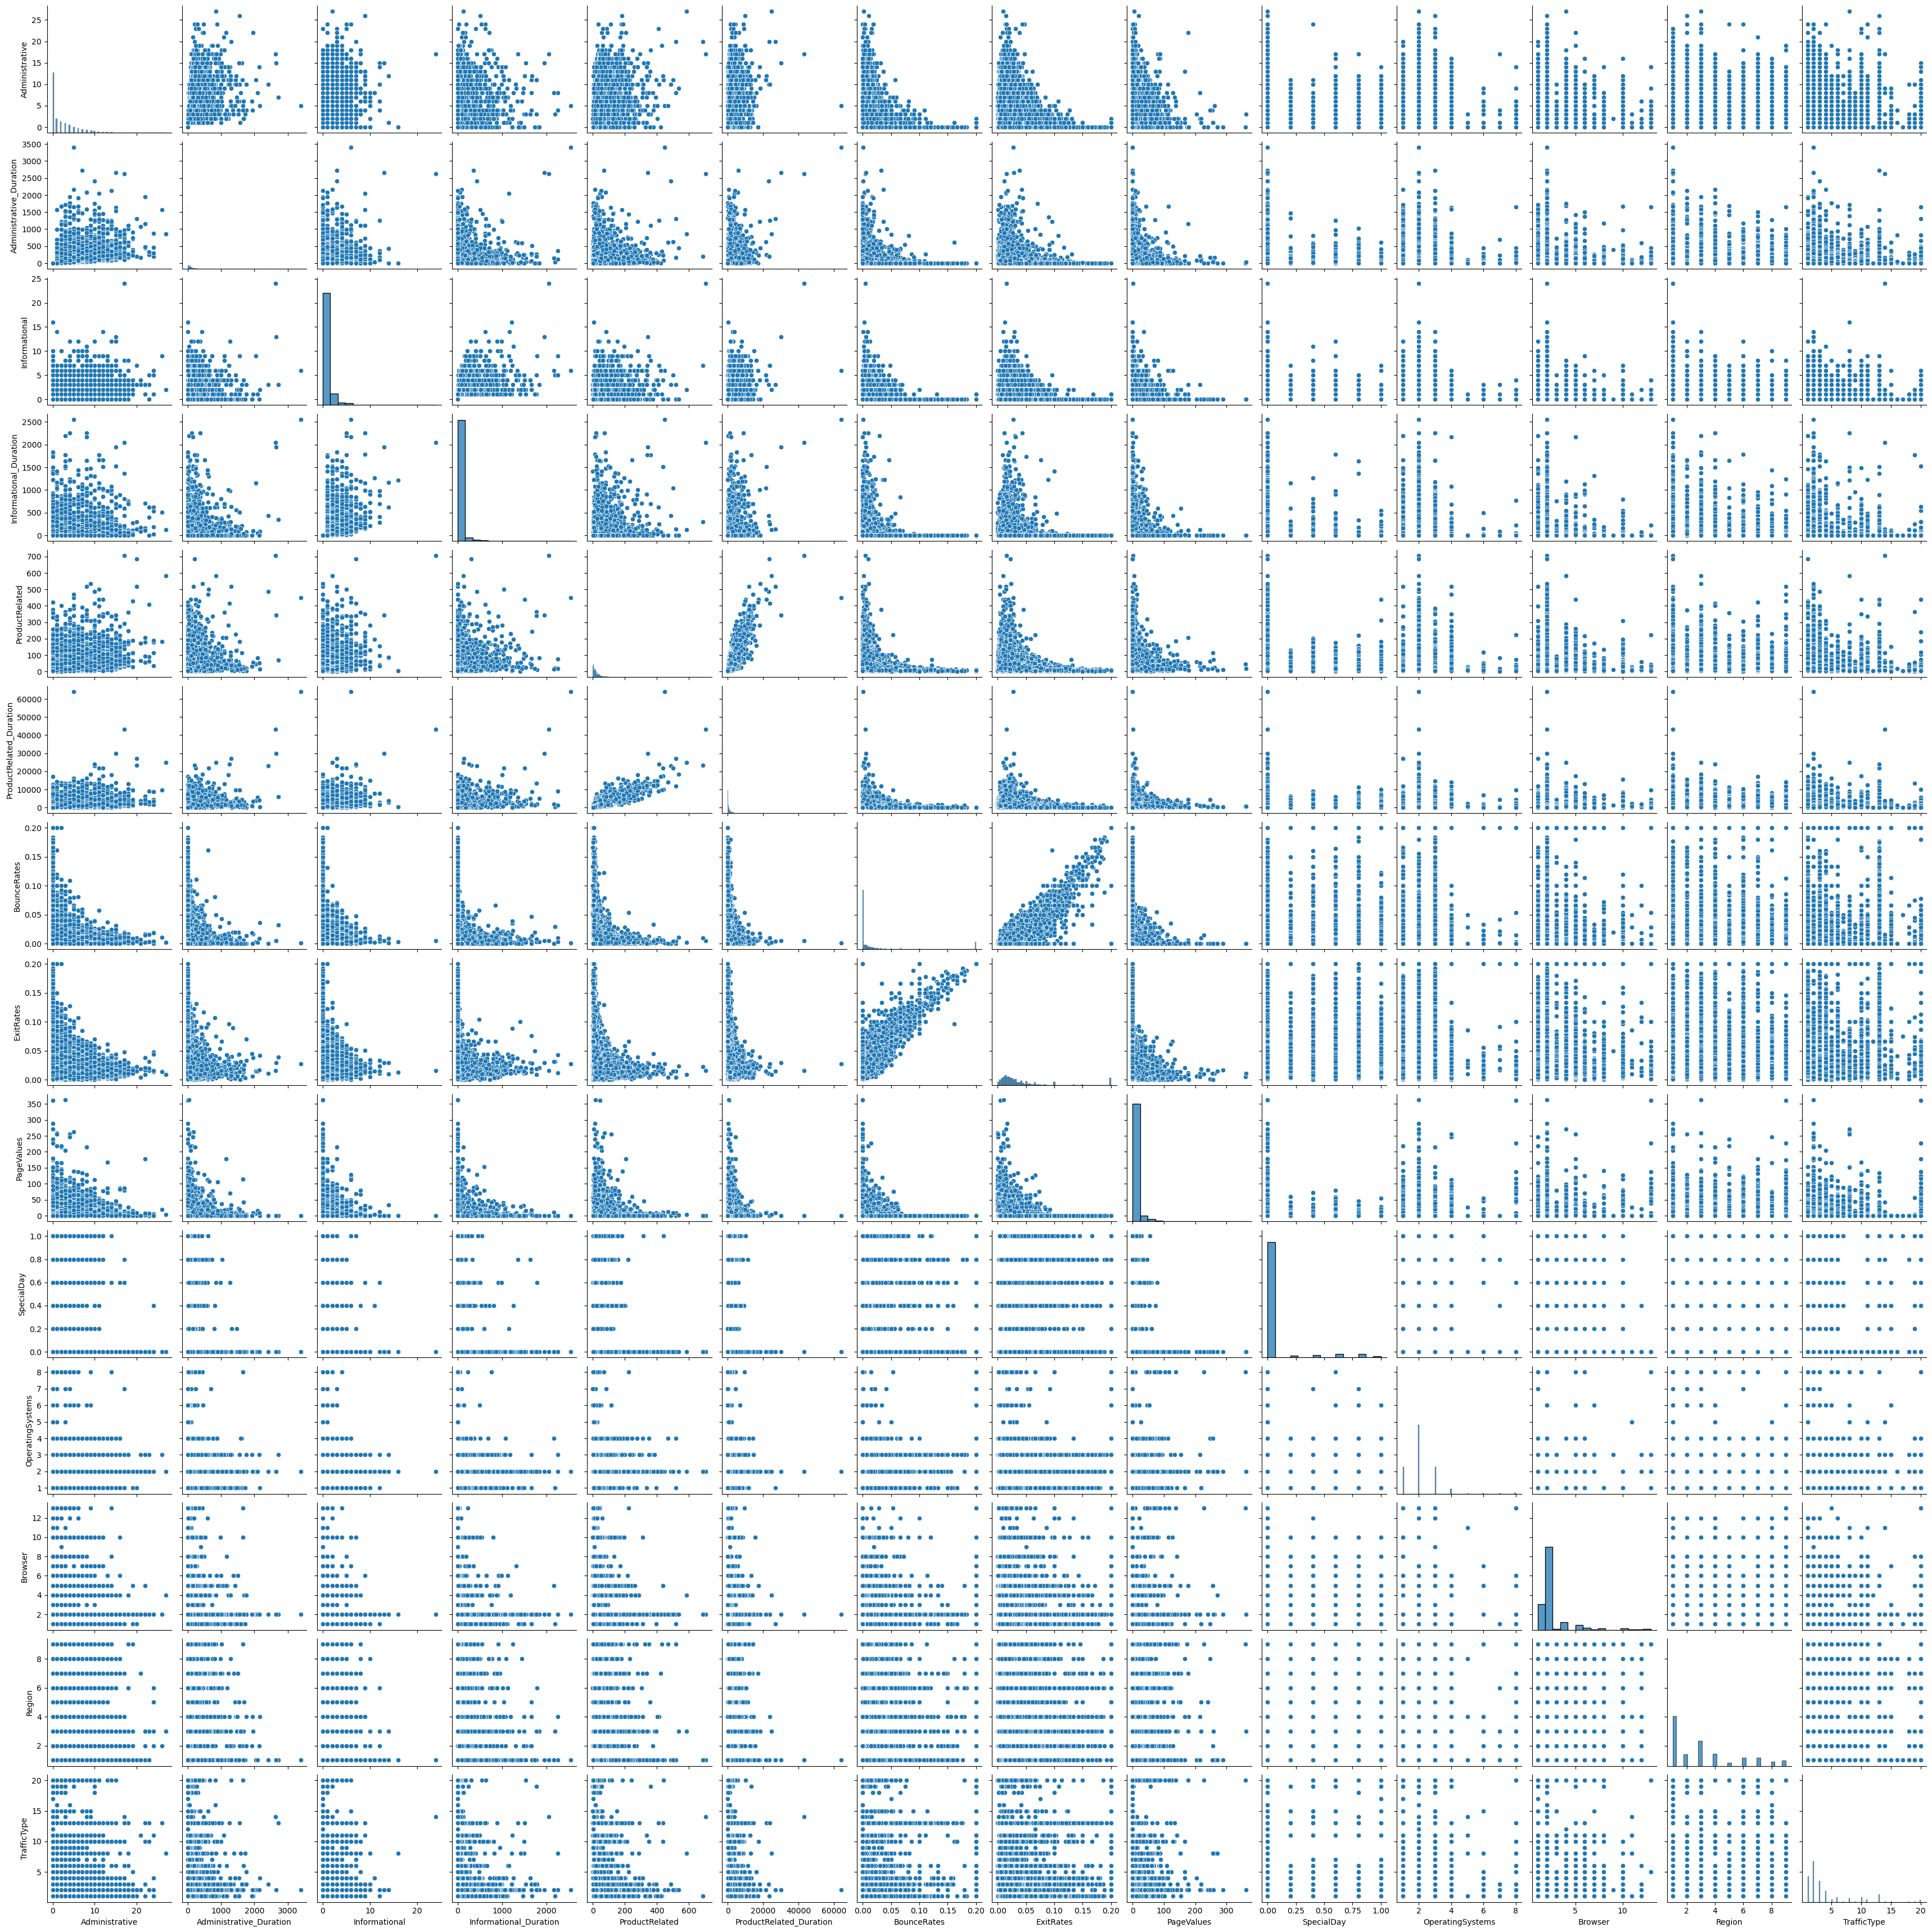

In [21]:
sns.pairplot(X)

In [180]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [108]:
from sklearn.preprocessing import StandardScaler

In [110]:
sc_X = StandardScaler()

In [112]:
X = sc_X.fit_transform(X)

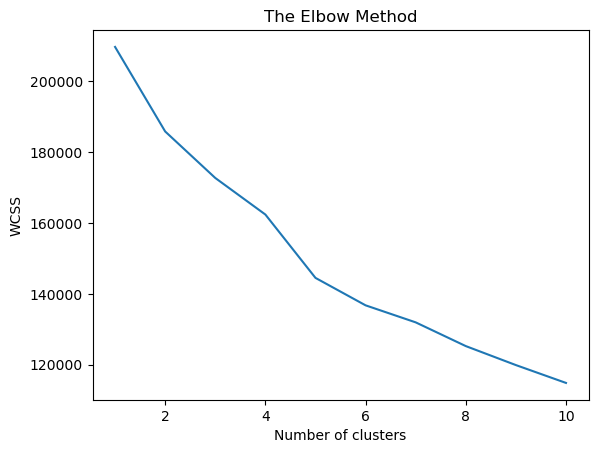

In [116]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Clusters: 2, Silhouette Score: 0.2595
Clusters: 3, Silhouette Score: 0.1703
Clusters: 4, Silhouette Score: 0.1735
Clusters: 5, Silhouette Score: 0.2046
Clusters: 6, Silhouette Score: 0.1586
Clusters: 7, Silhouette Score: 0.1431
Clusters: 8, Silhouette Score: 0.1518
Clusters: 9, Silhouette Score: 0.1555
Clusters: 10, Silhouette Score: 0.1512


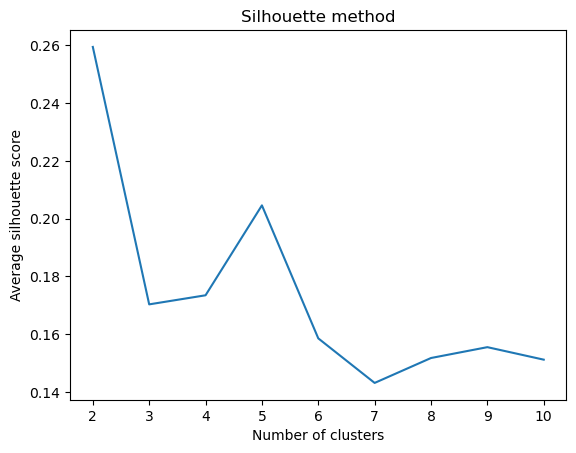

In [134]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range (2,11):
    kmeans = KMeans( n_clusters = i, init = 'k-means++', random_state = 42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

for i, score in enumerate(silhouette_scores, start=2):
    print(f"Clusters: {i}, Silhouette Score: {score:.4f}")

plt.plot(range(2,11),silhouette_scores)
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette score')
plt.show()

In [184]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state =42)
y_kmeans = kmeans.fit_predict(X)

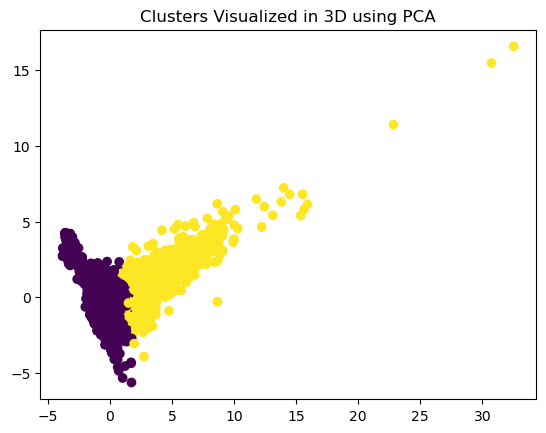

In [185]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
data_2d = pca.fit_transform(X)
plt.scatter(data_2d[:, 0], data_2d[:, 1],c=y_kmeans, cmap='viridis')
plt.title('Clusters Visualized in 3D using PCA')
plt.show()

In [196]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.20093093, 0.1057332 , 0.08258504, 0.06968252])

In [198]:
sum(pca.explained_variance_ratio_)

0.4589316857701616

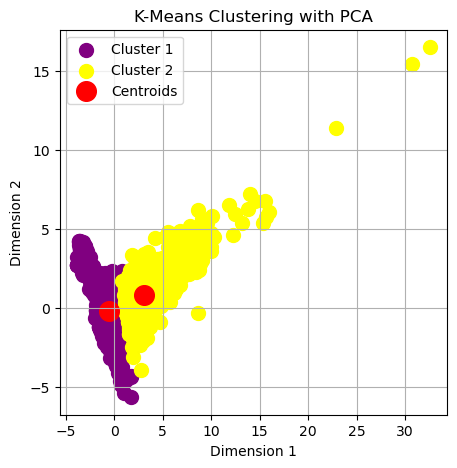

In [252]:
import matplotlib.pyplot as plt

# Colors for the clusters
colors = ['purple', 'yellow']  # Extend colors if you have more clusters

plt.figure(figsize=(5, 5))

# Plotting the clusters
for i in range(2):  # Change range(2) to the number of clusters you have
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1]
                , s=100, c=colors[i], label='Cluster ' + str(i + 1))

# Plotting the centroids if needed
centroids = kmeans.cluster_centers_
centroids_reduced = pca.transform(centroids)  # Transform centroids to PCA space
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s=200, c='red', label='Centroids', marker='o')

plt.title('K-Means Clustering with PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid()
plt.show()